# Data Processing
- Clean Data

In [37]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [38]:
# Create a DataFrame class that is an extension of pd.DataFrame. 
# This is unnecessary and only good when there is highly repetitive task
# Made this for practice.

class TwitterDataFrame(pd.DataFrame):
    def __init__(self, *args, **kwargs):
        # use the __init__ method from DataFrame to ensure
        # that we're inheriting the correct behavior
        super(TwitterDataFrame, self).__init__(*args, **kwargs)
    
    # this method is makes it so our methods return an instance
    # of ExtendedDataFrame, instead of a regular DataFrame
    @property
    def _constructor(self):
        return TwitterDataFrame
    
    # =================================        
    # == add custom methods below! ==
    # =================================
    
    def is_nulls(self):
#         print(self.isnull().sum())
        return self.isnull().sum()
    
    def drop_irrelevant(self):
        to_drop = [col for col in self.columns if 'Unnamed:' in col]
        return self.drop(columns=to_drop)

In [39]:
df = pd.read_csv('./dataset/main-trump-tweets.csv', sep=',')

,Date,Source,Tweet Content,Tweet ID,Tweet URL,User
0,2020-08-11 03:24:00,Sprout Social,The USPS delivers medicine to our nation’s sen...,1293025346640543749,https://twitter.com/statuses/1293025346640543749,KamalaHarris
1,2020-08-12 00:24:11,Twitter for Android,@KurtSchlichter Such a shame Biden picked a Ja...,1293342483506757633,https://twitter.com/statuses/1293342483506757633,SomeRandoHuman
2,2020-08-12 00:24:11,Twitter for Android,@StevenTDennis Ivanka gave also Trump has give...,1293342481459732480,https://twitter.com/statuses/1293342481459732480,215_5544
3,2020-08-12 00:24:11,Twitter for iPhone,not voting for biden is voting for trump.,1293342480285532160,https://twitter.com/statuses/1293342480285532160,onlythegoode
4,2020-08-12 00:24:10,Twitter for iPhone,@shaunking So based on this math you will be s...,1293342478951567360,https://twitter.com/statuses/1293342478951567360,KScotty
5,2020-08-12 00:24:10,Twitter for Android,"Pence stumps for Trump at Mormon church. ""4 mo...",1293342477533863937,https://twitter.com/statuses/1293342477533863937,RAUNSTAR1
6,2020-08-12 00:24:10,Twitter for iPhone,"Wait, are there going to be zoom debates? Like...",1293342477043281920,https://twitter.com/statuses/1293342477043281920,LaNoireDe
7,2020-08-12 00:24:10,Twitter Web App,@ali GO TRUMP!!,1293342476875575296,https://twitter.com/statuses/1293342476875575296,theladyvivianne
8,2020-08-12 00:24:10,Twitter for iPhone,@samstein Team Trump’s Plan A was use Ukraine ...,1293342476732964873,https://twitter.com/statuses/1293342476732964873,Bru8466
9,2020-08-12 00:24:10,Twitter for Android,Should I tiktok to\nA: stick it to trump \n\nB...,1293342475742875650,https://twitter.com/statuses/1293342475742875650,ZionBuild____


In [47]:
# A list of stopwords
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "can", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "will" ]

In [41]:
# Find @user - function that reads tweets and returns the @user if there is one in the tweets
def at_user(tweet):
    
    id_hash = {}
    '''
    Find @user_name and return the start:end index in the tweet
    '''
    pattern = r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)'
    at_users = re.findall(pattern, tweet)
    if at_users:
        return at_users
    else:
        pass

    
# Clean Tweets - create a function that cleans tweets (removing url, hashtags #, emojis)
def clean_tweet(tweet):
    
    # Removes @mentions - @[A-Za-z0-9] looks for @mentions patterns: @Username019, @username, @908    
    mod_tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) # removes @mentions and replace with empty string
    mod_tweet = re.sub(r'#', '', mod_tweet) # removes #hastag
    mod_tweet = re.sub(r'RT[\s]+', '', mod_tweet) # removes RT retweet
    mod_tweet = re.sub(r'https?:\/\/\S+', '', mod_tweet) # removes hyperlinks: http, https
    
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    
    mod_tweet = re.sub(emoj, '', mod_tweet) # removes emojis
    
    return mod_tweet


In [43]:
# Saving tweet mentions in Tweet to a column
df['Mentions'] = df['Tweet Content'].apply(at_user)
df['Mentions'].isnull().sum() # Check how many tweets do not have a mention

# Cleaning Tweet
df['Tweet Content'] = df['Tweet Content'].apply(clean_tweet)
df.head()

,Unnamed: 0,Date,Source,Tweet Content,Tweet ID,Tweet URL,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,User,Mentions
0,0,2020-08-11 03:24:00,Sprout Social,The USPS delivers medicine to our nation’s sen...,1293025346640543749,https://twitter.com/statuses/1293025346640543749,0.0,0.0,0.0,0.0,0.0,KamalaHarris,None
1,1,2020-08-12 00:24:11,Twitter for Android,Such a shame Biden picked a Jamaican/Indian c...,1293342483506757633,https://twitter.com/statuses/1293342483506757633,1.0,1.0,1.0,1.0,1.0,SomeRandoHuman,[KurtSchlichter]
2,2,2020-08-12 00:24:11,Twitter for Android,Ivanka gave also Trump has given Twice,1293342481459732480,https://twitter.com/statuses/1293342481459732480,2.0,2.0,2.0,2.0,2.0,215_5544,[StevenTDennis]
3,3,2020-08-12 00:24:11,Twitter for iPhone,not voting for biden is voting for trump.,1293342480285532160,https://twitter.com/statuses/1293342480285532160,3.0,3.0,3.0,3.0,3.0,onlythegoode,None
4,4,2020-08-12 00:24:10,Twitter for iPhone,So based on this math you will be shilling fo...,1293342478951567360,https://twitter.com/statuses/1293342478951567360,4.0,4.0,4.0,4.0,4.0,KScotty,[shaunking]


### Cleaning the dataframe further by dropping redundant columns from merge

In [45]:
tweet_df = TwitterDataFrame(df)
tweet_df = tweet_df.drop_irrelevant()
tweet_df

,Date,Source,Tweet Content,Tweet ID,Tweet URL,User,Mentions
0,2020-08-11 03:24:00,Sprout Social,The USPS delivers medicine to our nation’s sen...,1293025346640543749,https://twitter.com/statuses/1293025346640543749,KamalaHarris,None
1,2020-08-12 00:24:11,Twitter for Android,Such a shame Biden picked a Jamaican/Indian c...,1293342483506757633,https://twitter.com/statuses/1293342483506757633,SomeRandoHuman,[KurtSchlichter]
2,2020-08-12 00:24:11,Twitter for Android,Ivanka gave also Trump has given Twice,1293342481459732480,https://twitter.com/statuses/1293342481459732480,215_5544,[StevenTDennis]
3,2020-08-12 00:24:11,Twitter for iPhone,not voting for biden is voting for trump.,1293342480285532160,https://twitter.com/statuses/1293342480285532160,onlythegoode,None
4,2020-08-12 00:24:10,Twitter for iPhone,So based on this math you will be shilling fo...,1293342478951567360,https://twitter.com/statuses/1293342478951567360,KScotty,[shaunking]
5,2020-08-12 00:24:10,Twitter for Android,"Pence stumps for Trump at Mormon church. ""4 mo...",1293342477533863937,https://twitter.com/statuses/1293342477533863937,RAUNSTAR1,None
6,2020-08-12 00:24:10,Twitter for iPhone,"Wait, are there going to be zoom debates? Like...",1293342477043281920,https://twitter.com/statuses/1293342477043281920,LaNoireDe,None
7,2020-08-12 00:24:10,Twitter Web App,GO TRUMP!!,1293342476875575296,https://twitter.com/statuses/1293342476875575296,theladyvivianne,[ali]
8,2020-08-12 00:24:10,Twitter for iPhone,Team Trump’s Plan A was use Ukraine to knock ...,1293342476732964873,https://twitter.com/statuses/1293342476732964873,Bru8466,[samstein]
9,2020-08-12 00:24:10,Twitter for Android,Should I tiktok to\nA: stick it to trump \n\nB...,1293342475742875650,https://twitter.com/statuses/1293342475742875650,ZionBuild____,None


Save cleaned DF to CSV

In [71]:
# df.to_csv('./dataset/main-cleaned-trump-tweets.csv', sep=',')

## Plot Word Cloud
Plot the words that appear most from all tweets in the form of a wordcloud

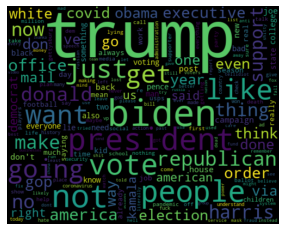

In [53]:
all_words = ' '.join([tweet for tweet in df['Tweet Content']]).lower()
# Plot out words based on term ferquency with WordCloud
word_cloud = WordCloud(width=500, 
                       height=400,
                       max_font_size = 119,
                       stopwords=stopwords,
                       collocations=False, # get rid of words that are frequently grouped together in your text
                       random_state=42).generate(all_words)

plt.imshow(word_cloud, interpolation='bilinear' )
plt.axis('off')
plt.show()